In [2]:
import torch
mask = torch.eye(4,4)
mask

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [3]:
mask.repeat(2, 2)

tensor([[1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1.]])

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import signal
import matplotlib.ticker as ticker
#import seaborn as sns; sns.set()

datas = ['mini_test', 'crop','euro', 'isic', 'chest']
datas_fg = ["cars", 'cub', "places", "plantae", 'tiered_test']
datas_full = ['miniIM test', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
import matplotlib
myfonts = "Times New Roman"
#matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts

In [ ]:
def fmt(x, pos):
    return '{}%'.format(int(x))

### Layer Diff

In [207]:
df1.columns

Index(['backbone.trunk.0.weight', 'backbone.trunk.1.weight',
       'backbone.trunk.1.bias', 'backbone.trunk.4.C1.weight',
       'backbone.trunk.4.BN1.weight', 'backbone.trunk.4.BN1.bias',
       'backbone.trunk.4.C2.weight', 'backbone.trunk.4.BN2.weight',
       'backbone.trunk.4.BN2.bias', 'backbone.trunk.5.C1.weight',
       'backbone.trunk.5.BN1.weight', 'backbone.trunk.5.BN1.bias',
       'backbone.trunk.5.C2.weight', 'backbone.trunk.5.BN2.weight',
       'backbone.trunk.5.BN2.bias', 'backbone.trunk.5.shortcut.weight',
       'backbone.trunk.5.BNshortcut.weight',
       'backbone.trunk.5.BNshortcut.bias', 'backbone.trunk.6.C1.weight',
       'backbone.trunk.6.BN1.weight', 'backbone.trunk.6.BN1.bias',
       'backbone.trunk.6.C2.weight', 'backbone.trunk.6.BN2.weight',
       'backbone.trunk.6.BN2.bias', 'backbone.trunk.6.shortcut.weight',
       'backbone.trunk.6.BNshortcut.weight',
       'backbone.trunk.6.BNshortcut.bias', 'backbone.trunk.7.C1.weight',
       'backbone.trunk.7.B

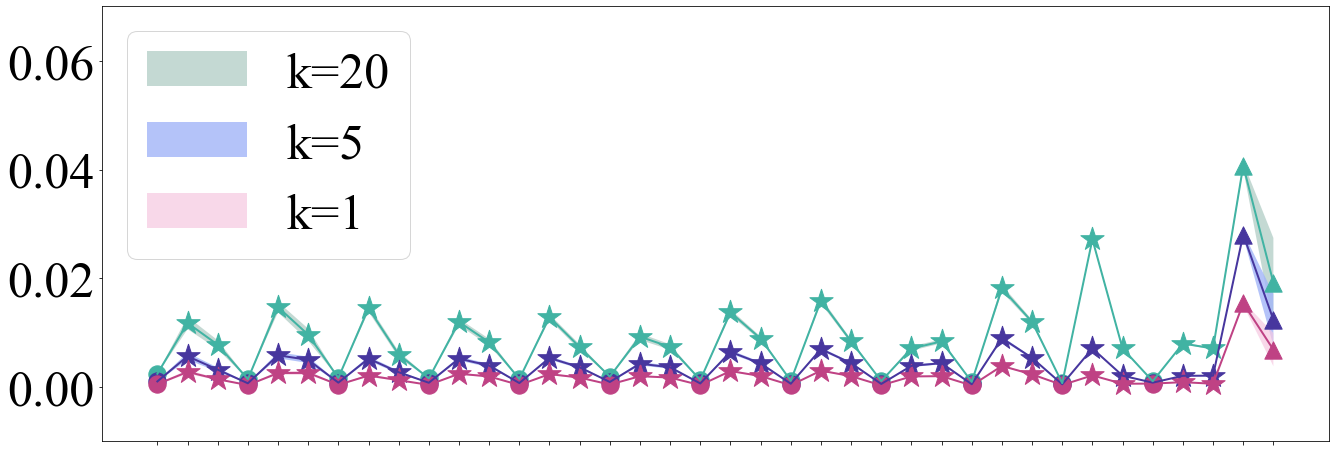

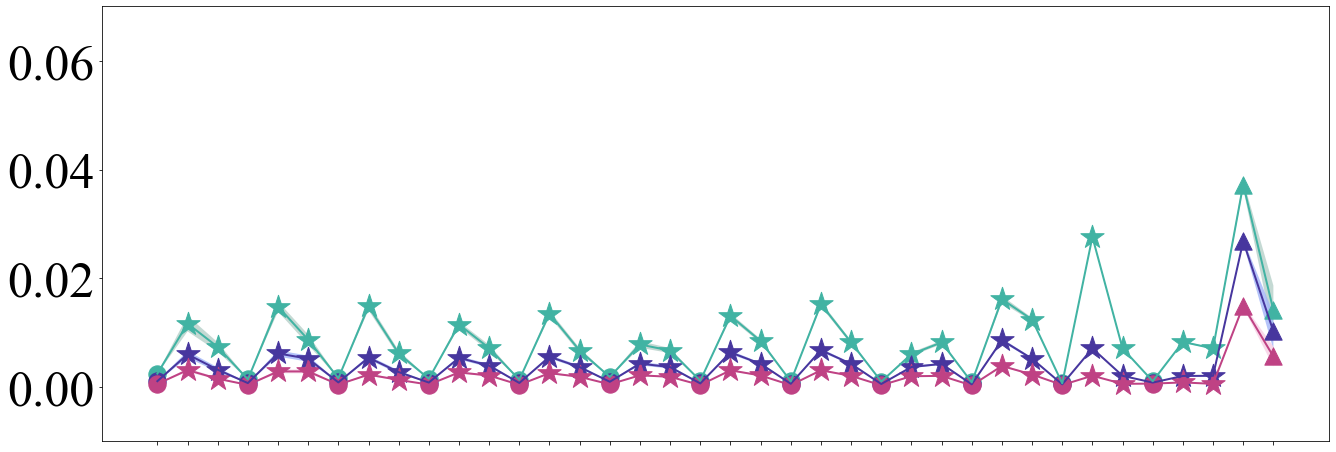

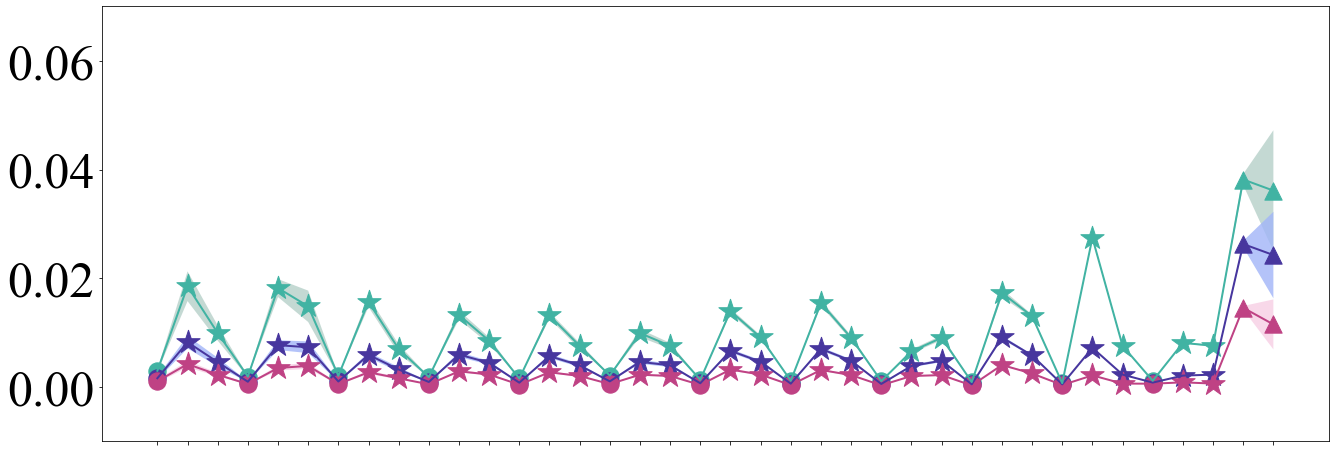

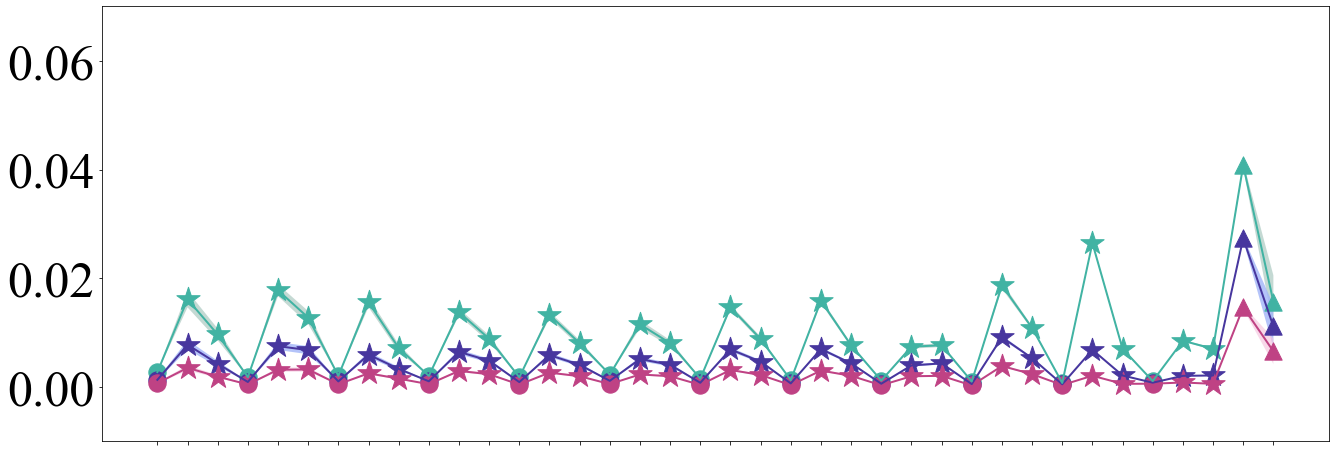

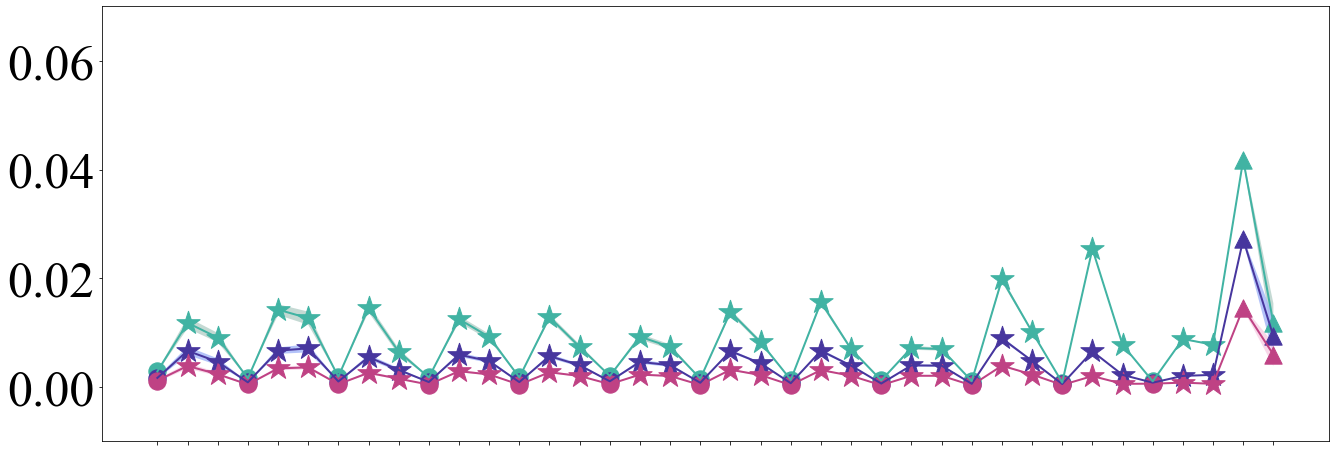

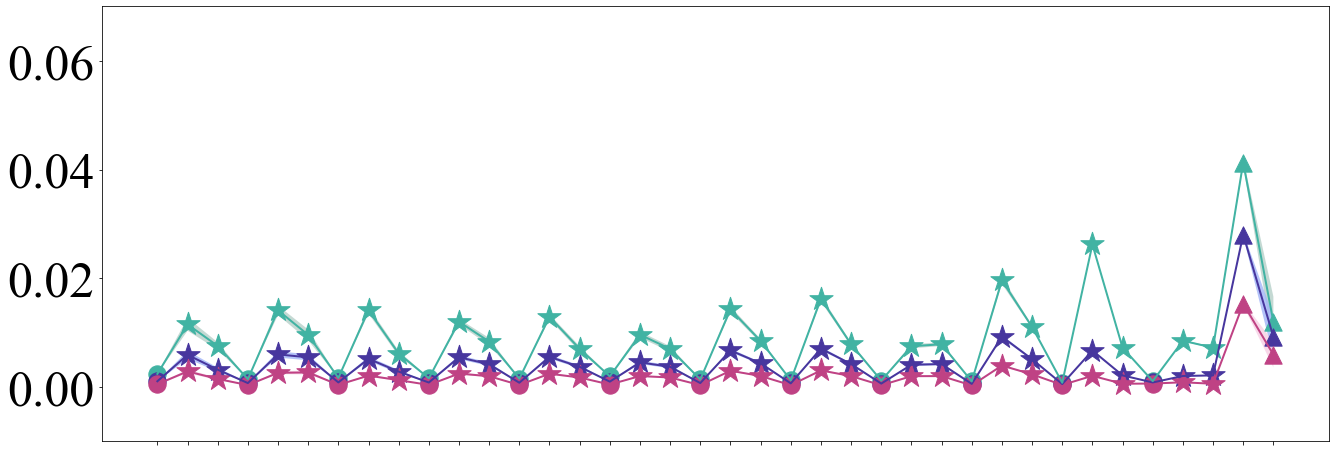

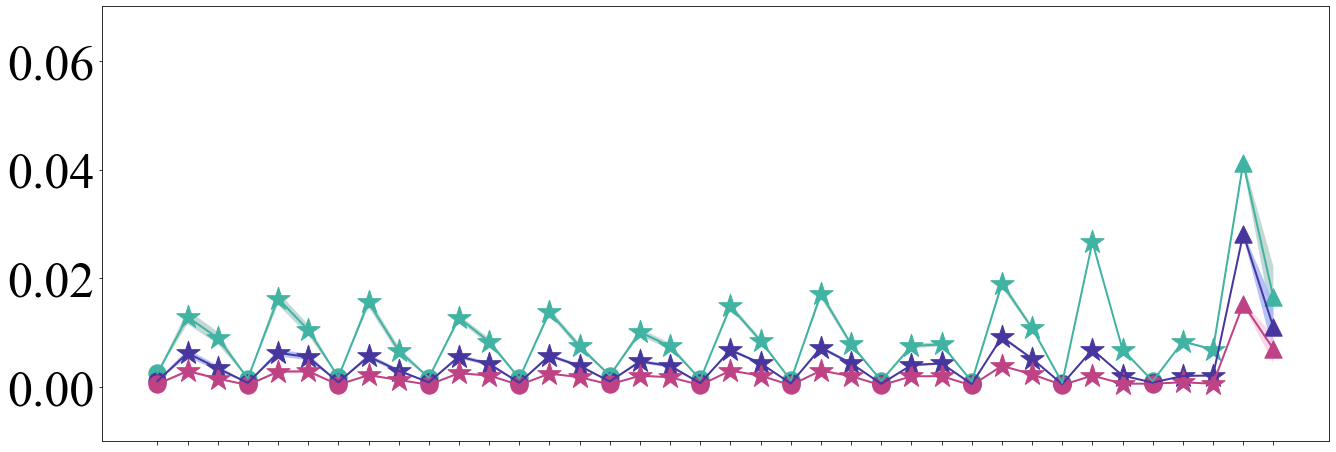

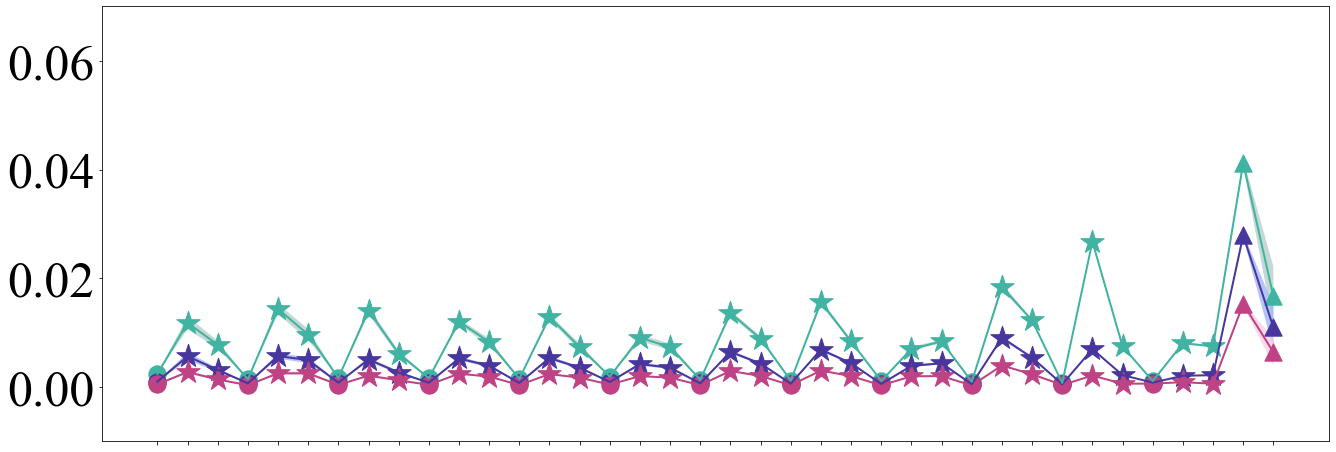

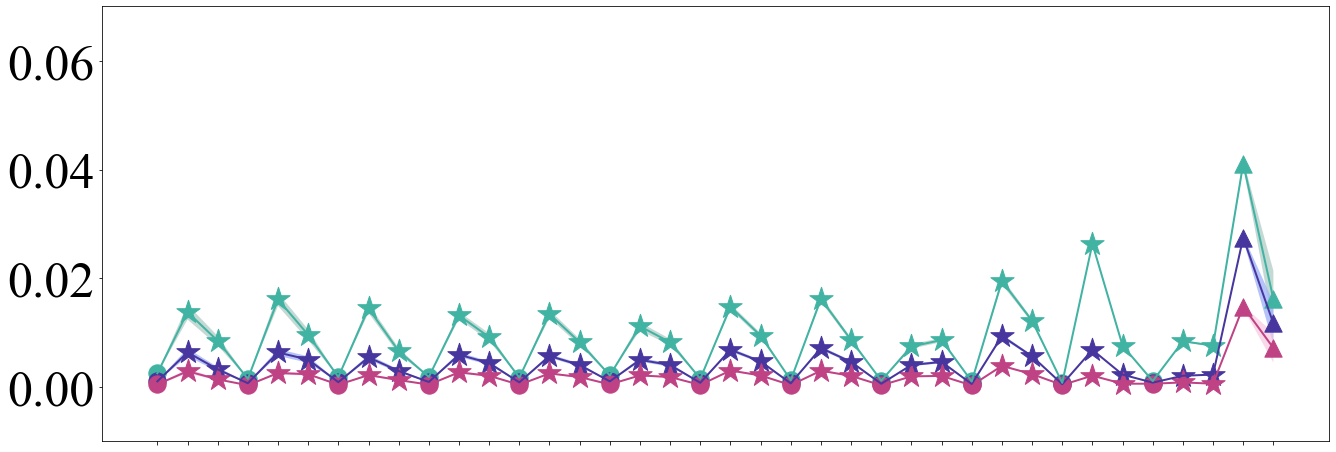

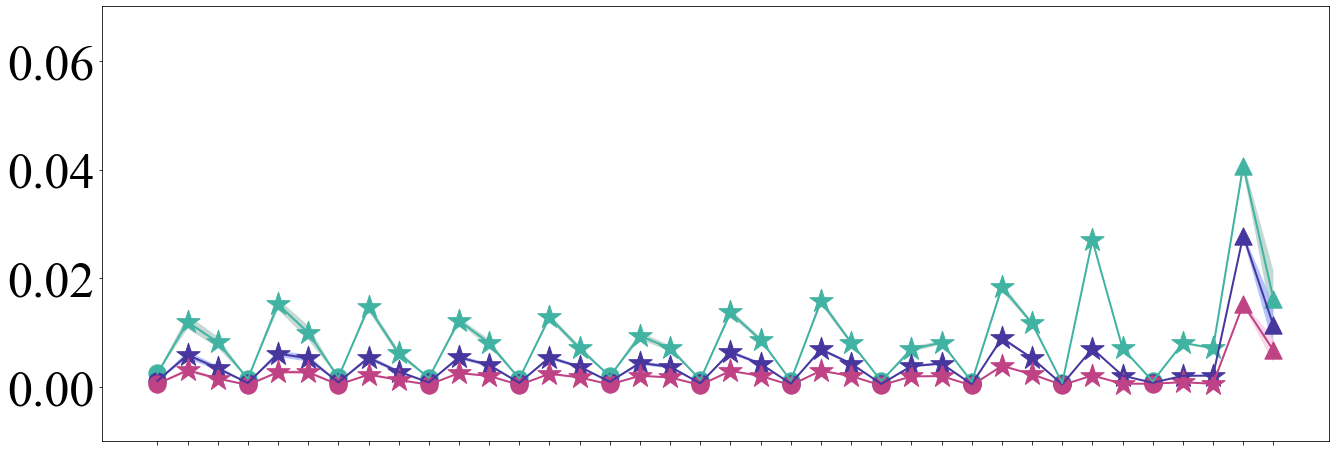

In [214]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format(data, shot)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    column_list = [''] * len(df1.columns)
    path5 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/layer_diff.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet10_simclr_LS_default/{}/05way_020shot_full_default/layer_diff.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')


    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu20 = df20.mean()
    sigma20 = df20.std()
    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#B6D0C9', alpha=0.8, label='k=20')
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#a1b5f8', alpha=0.8, label='k=5')
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='#f6c8e1', alpha=0.7, label='k=1')
    
    mu1.plot(linewidth = 2, color='#bf4284', label='', style=layer_marker )
    mu5.plot(linewidth = 2, color='#47369e', label='', style=layer_marker )
    mu20.plot(linewidth = 2, color='#41B3A3', label='', style=layer_marker )
    plt.legend().set_visible(False)
    
    for i in range(0,38,1):
        if 'BN' in df1.columns[i] or '.1.' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='*', label='', s = 600)
            plt.scatter(i, mu5[i], color="#47369e", marker='*', label='',  s = 600)
            plt.scatter(i, mu1[i], color="#bf4284", marker='*', label='', s = 600)
        elif 'shortcut' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='o', label='', s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='',  s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='o', label='', s = 300)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='^', label='',  s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='^', label='', s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='^', label='',  s = 300)
        else:
            plt.scatter(i, mu20[i], color="#41B3A3", marker='o', label='', s = 300)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', s = 300)
            plt.scatter(i, mu1[i], color="#bf4284", marker='o', label='', s = 300)

    
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    plt.xticks(np.arange(0, 38, 1), column_list, size = 25)
    plt.ylim([-0.01, 0.07])
    plt.yticks(np.arange(0, 0.07, 0.02), size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/mini/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [ ]:
for data in datas+datas_fg:
    plt.subplots(figsize = (22, 8))
    path1 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_001shot_full_default/layer_diff.csv'.format(data, shot)
    df1 = pd.read_csv(path1, index_col='Unnamed: 0')
    path5 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_005shot_full_default/layer_diff.csv'.format(data)
    df5 = pd.read_csv(path5, index_col='Unnamed: 0')
    path20 = './logs/baseline/output/resnet18_base_LS_default/{}/05way_020shot_full_default/layer_diff.csv'.format(data)
    df20 = pd.read_csv(path20, index_col='Unnamed: 0')

    mu1 = df1.mean()
    sigma1 = df1.std()
    mu5 = df5.mean()
    sigma5 = df5.std()
    mu20 = df20.mean()
    sigma20 = df20.std()

    plt.fill_between(df20.columns, mu20+sigma20, mu20-sigma20, facecolor='#f6c8e1', alpha=0.8, label='k=20')
    mu20.plot(linewidth = 2, color='#bf4284', label='' )
    
    plt.fill_between(df5.columns, mu5+sigma5, mu5-sigma5, facecolor='#a1b5f8', alpha=0.8, label='k=5')
    mu5.plot(linewidth = 2, color='#47369e', label='')
    
    plt.fill_between(df1.columns, mu1+sigma1, mu1-sigma1, facecolor='#B6D0C9', alpha=0.8, label='k=1')
    mu1.plot(linewidth = 2, color='#41B3A3', label='')
    
    for i in range(0,62,1):
        if 'conv' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='o', label='', linestyle="-", s = 180)
            plt.scatter(i, mu5[i], color="#47369e", marker='o', label='', linestyle="-", s = 180)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='o', label='', linestyle="-", s = 180)
        elif 'bn' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='*', label='', linestyle="-", s = 250)
            plt.scatter(i, mu5[i], color="#47369e", marker='*', label='', linestyle="-", s = 250)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='*', label='', linestyle="-", s = 250)
        elif 'downsample' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='v', label='', linestyle="-", s = 180)
            plt.scatter(i, mu5[i], color="#47369e", marker='v', label='', linestyle="-", s = 180)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='v', label='', linestyle="-", s = 180)
        elif 'classifier' in df1.columns[i]:
            plt.scatter(i, mu20[i], color="#bf4284", marker='x', label='', linestyle="-", s = 180)
            plt.scatter(i, mu5[i], color="#47369e", marker='x', label='', linestyle="-", s = 180)
            plt.scatter(i, mu1[i], color="#41B3A3", marker='x', label='', linestyle="-", s = 180)

    plt.legend().set_visible(False)
    if data == 'mini_test':
        plt.legend(fontsize = 50)
    
    plt.xticks(np.arange(0, 62, 1), ['']*62, size = 25)
    plt.ylim([0, 0.07])
    plt.yticks(np.arange(0, 0.07, 0.02), size=50)
    #plt.title(datas_full[datas.index(data)], size =20)
    plt.savefig('./img_pdf/layer_diff/base/tiered/{}.pdf'.format(data), bbox_inches='tight', format='pdf')
    plt.show()

In [ ]:
list(df1.columns)

['backbone.trunk.0.weight',
 'backbone.trunk.1.weight',
 'backbone.trunk.1.bias',
 'backbone.trunk.4.C1.weight',
 'backbone.trunk.4.BN1.weight',
 'backbone.trunk.4.BN1.bias',
 'backbone.trunk.4.C2.weight',
 'backbone.trunk.4.BN2.weight',
 'backbone.trunk.4.BN2.bias',
 'backbone.trunk.5.C1.weight',
 'backbone.trunk.5.BN1.weight',
 'backbone.trunk.5.BN1.bias',
 'backbone.trunk.5.C2.weight',
 'backbone.trunk.5.BN2.weight',
 'backbone.trunk.5.BN2.bias',
 'backbone.trunk.5.shortcut.weight',
 'backbone.trunk.5.BNshortcut.weight',
 'backbone.trunk.5.BNshortcut.bias',
 'backbone.trunk.6.C1.weight',
 'backbone.trunk.6.BN1.weight',
 'backbone.trunk.6.BN1.bias',
 'backbone.trunk.6.C2.weight',
 'backbone.trunk.6.BN2.weight',
 'backbone.trunk.6.BN2.bias',
 'backbone.trunk.6.shortcut.weight',
 'backbone.trunk.6.BNshortcut.weight',
 'backbone.trunk.6.BNshortcut.bias',
 'backbone.trunk.7.C1.weight',
 'backbone.trunk.7.BN1.weight',
 'backbone.trunk.7.BN1.bias',
 'backbone.trunk.7.C2.weight',
 'backbone